## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [14]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBRegressor
import warnings

In [15]:
#since total score is continuos value so its a regressor problem
#import data
df=pd.read_csv('StudentsPerformance.csv')

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
# here we try to predict math score so take it as (y)(dependent variable) and rest all is our 
# (x)(independent variables) that is feature to get the prediction, u can predict any one value and take rest as (x)

#so in x we take all columns dropping maths one
X=df.drop(columns=['math score'],axis=1)


In [19]:
X.head() # no maths column here

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [20]:
#take our prediction column in y
Y=df['math score']
Y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [22]:
#Checking the number of unique values of each column
X.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
reading score                  72
writing score                  77
dtype: int64

In [23]:
print("Categories in 'gender' variable:     ")
print(X['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ")
print(X['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:" )
print(X['parental level of education'].unique())

print("Categories in 'lunch' variable:     " )
print(X['lunch'].unique())

print("Categories in 'test preparation course' variable:     ")
print(X['test preparation course'].unique())

Categories in 'gender' variable:     
['female' 'male']
Categories in 'race_ethnicity' variable:  
['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     
['standard' 'free/reduced']
Categories in 'test preparation course' variable:     
['none' 'completed']


In [24]:
#now these features are in categorical variables like characters and not numbers
# so we convert them in number that we can use since we have less number of feature so we 
# use one hot encoding and convert in numerical feature and then apply standardization 
# on numerical features so match the one hot encoding
# categorial features are objects like character words
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns # get numerical features
cat_features = X.select_dtypes(include="object").columns # get categorical features


In [25]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler # one hot encoding and stadardization
from sklearn.compose import ColumnTransformer # this is to combine one hot encoding and then standardization

In [26]:
# initialise hot encoding and stadardization
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

In [27]:
# use column transformer to first do one hot encoding(for categorical features) and the standard scalar(for numerical features) 
# applying both so all sacle get on a similar scale
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [30]:
# now apply that columnTransformer on X
X=preprocessor.fit_transform(X)

In [31]:
X.shape

(1000, 19)

In [32]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [33]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
#20%(200) data become test and rest training
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [36]:
# evaluate our model on various regression problem ross function like MAE,MSE,r2score etc
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [48]:
# hyperparameter tuning of the model
params={
                "Decision Tree": {
                    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                    # 'splitter':['best','random'],
                    # 'max_features':['sqrt','log2'],
                },
                "Random Forest":{
                    # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                 
                    # 'max_features':['sqrt','log2',None],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Gradient Boosting":{
                    # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate':[.1,.01,.05,.001],
                    'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
                    # 'criterion':['squared_error', 'friedman_mse'],
                    # 'max_features':['auto','sqrt','log2'],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "Linear Regression":{},
                "XGBRegressor":{
                    'learning_rate':[.1,.01,.05,.001],
                    'n_estimators': [8,16,32,64,128,256]
                },
                "CatBoosting Regressor":{
                    'depth': [6,8,10],
                    'learning_rate': [0.01, 0.05, 0.1],
                    'iterations': [30, 50, 100]
                },
                "AdaBoost Regressor":{
                    'learning_rate':[.1,.01,0.5,.001],
                    # 'loss':['linear','square','exponential'],
                    'n_estimators': [8,16,32,64,128,256]
                }
                
            }

In [52]:

# Define the models with hyperparameter grids
models = {
  "Linear Regression": (LinearRegression(), {}),
  "Lasso": (Lasso(), {}),
  "Ridge": (Ridge(), {}),
  "K-Neighbors Regressor": (KNeighborsRegressor(), {}),
  "Decision Tree": (DecisionTreeRegressor(), params["Decision Tree"]),
  "Random Forest Regressor": (RandomForestRegressor(), params["Random Forest"]),
  "XGBRegressor": (XGBRegressor(), params["XGBRegressor"]),
  "AdaBoost Regressor": (AdaBoostRegressor(), params["AdaBoost Regressor"])
}

model_list = []
r2_list = []

for model_name, (model, param_grid) in models.items():
  # Apply hyperparameter tuning if parameters are provided
  if param_grid:
      model = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, random_state=42, n_jobs=-1)
  
  # Train model
  model.fit(X_train, Y_train)

  # Make predictions
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  
  # Evaluate Train and Test dataset
  model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(Y_train, y_train_pred)
  model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(Y_test, y_test_pred)

  print(model_name)
  model_list.append(model_name)
  
  print('Model performance for Training set')
  print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
  print("- R2 Score: {:.4f}".format(model_train_r2))

  print('----------------------------------')
  
  print('Model performance for Test set')
  print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
  print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
  print("- R2 Score: {:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)
  
  print('='*35)
  print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3243
- Mean Absolute Error: 4.2671
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3960
- Mean Absolute Error: 4.2158
- R2 Score: 0.8803


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 0.8555
-----------------------

c:\Pythonlearn\pythonlearn\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.1065
- Mean Absolute Error: 6.3250
- R2 Score: 0.7299




c:\Pythonlearn\pythonlearn\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2943
- Mean Absolute Error: 1.8359
- R2 Score: 0.9767
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9925
- Mean Absolute Error: 4.6232
- R2 Score: 0.8524


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 3.2813
- Mean Absolute Error: 2.5561
- R2 Score: 0.9522
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7953
- Mean Absolute Error: 4.5456
- R2 Score: 0.8620


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8691
- Mean Absolute Error: 4.8188
- R2 Score: 0.8472
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0972
- Mean Absolute Error: 4.7605
- R2 Score: 0.8472




In [57]:
best_model = max(zip(model_list, r2_list), key=lambda x: x[1])

In [58]:
best_model

('Ridge', 0.8805931485028737)

# Ridge has the best R2score so its the best model for this dataset 

In [59]:
# using Ridge Regression model for prediction
# Initialize the Ridge Regression model
ridge_model = Ridge(fit_intercept=True)

# Fit the model to the training data
ridge_model = ridge_model.fit(X_train, Y_train)

# Predict the target values for the test data
y_pred = ridge_model.predict(X_test)

# Calculate the R^2 score
score = r2_score(Y_test, y_pred) * 100

# Print the accuracy of the model
print("Accuracy of the model is %.2f" % score)

Accuracy of the model is 88.06


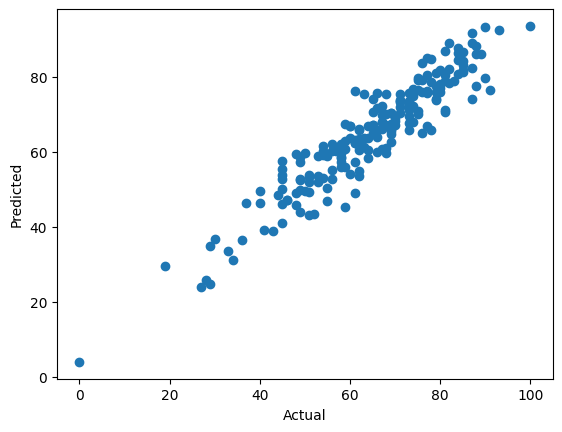

In [60]:
## Plot y_pred and y_test
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

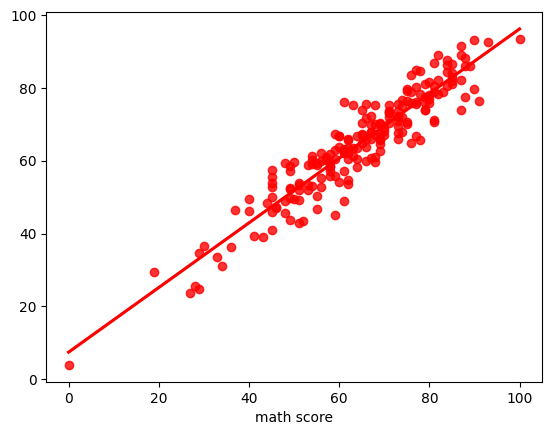

In [61]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color ='red');

In [62]:
#### Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':Y_test,'Predicted Value':y_pred,'Difference':Y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
...,...,...,...
408,52,43.492293,8.507707
332,62,62.170763,-0.170763
208,74,67.910325,6.089675
613,65,67.061504,-2.061504


In [63]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])